# Лабораторная работа 3. Выполнил: Лабуткин Иван Алексеевич, группа 4414

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict
import time
import copy
from sklearn.preprocessing import OneHotEncoder

## Загрузка и предобработка данных:

In [4]:
data_classify=pd.read_csv('weather_classification_data.csv', sep=',')#Загрузка датасета для классификации

In [6]:
#data_classify.info() #Типы данных в датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


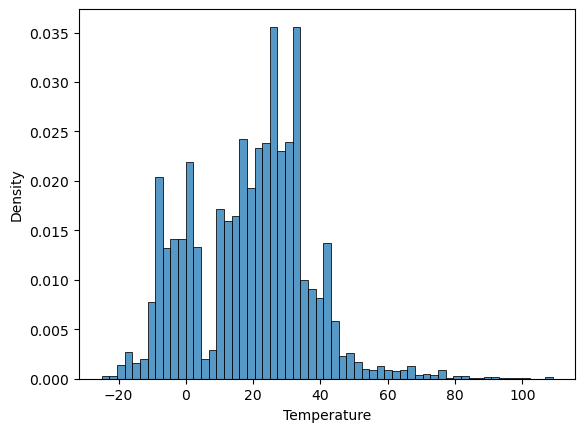

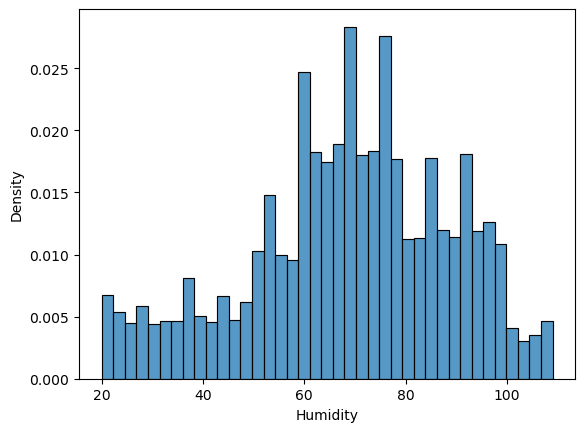

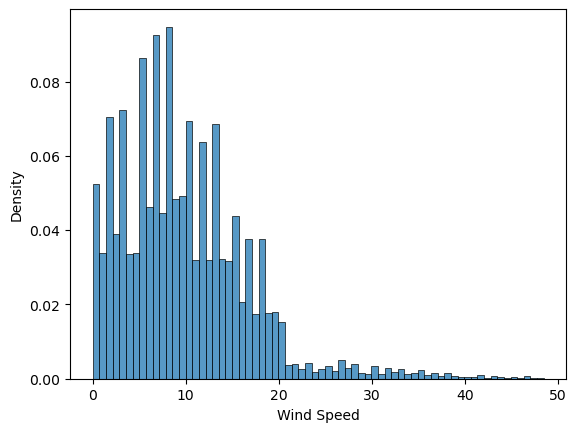

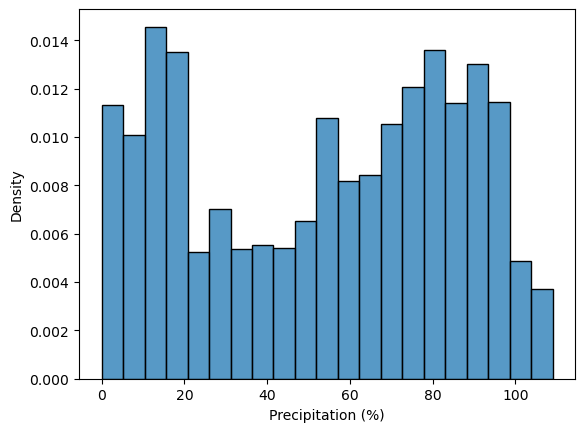

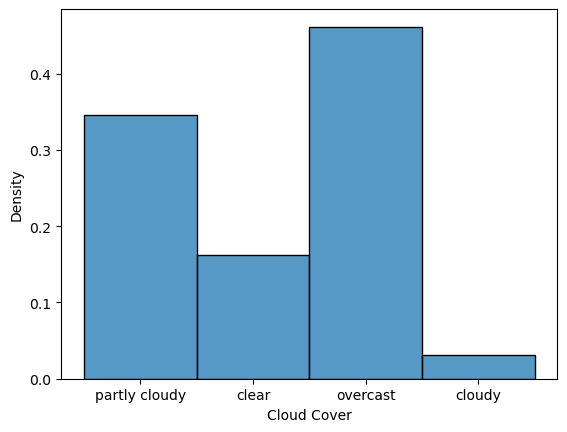

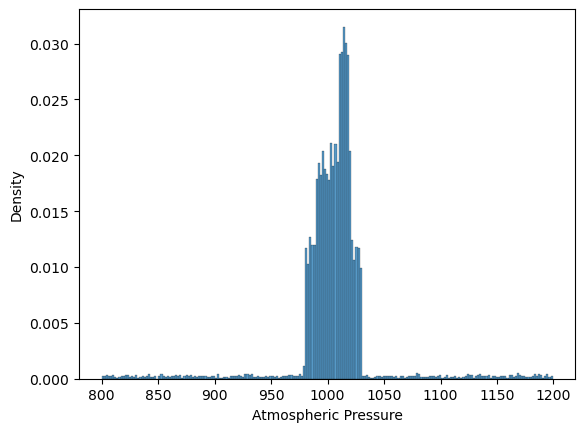

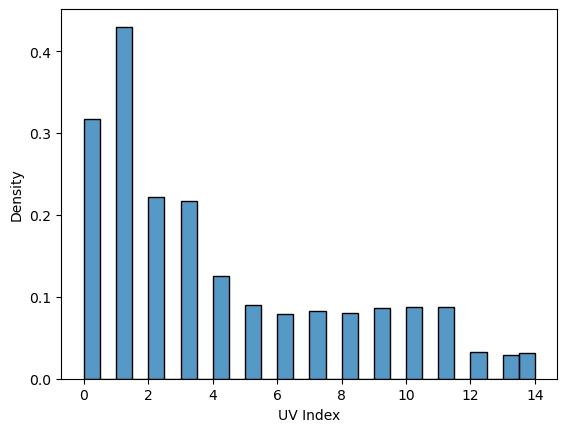

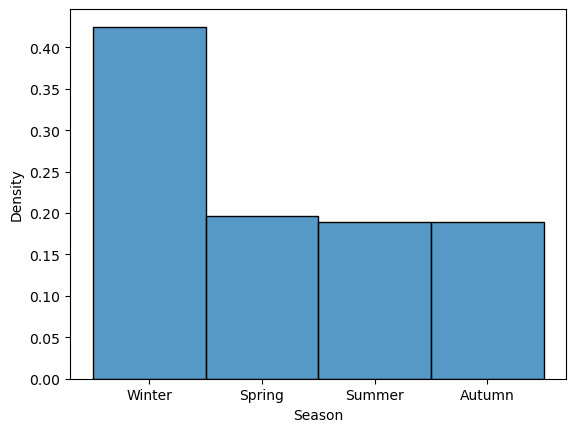

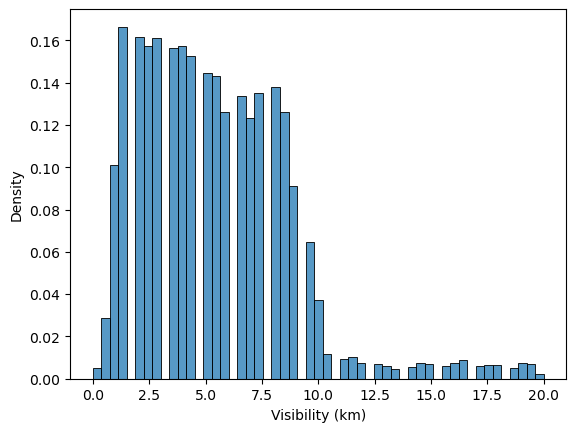

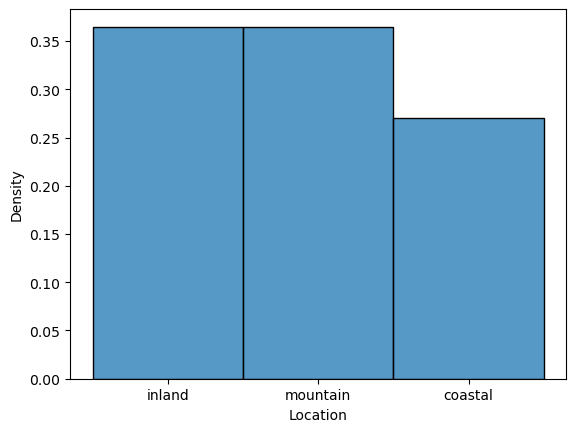

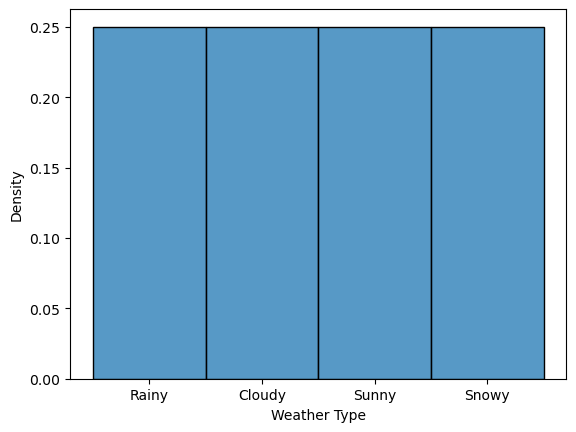

In [8]:
#for i in data_classify.columns: #Распределение значений внутри признаков
#    plt.figure(i)
#    sns.histplot(data_classify[i],stat="density")
#    plt.show()

In [9]:
X_1=data_classify.iloc[:,0:10].to_numpy() #Перевод данных в numpy-массивы
Y_1=data_classify.iloc[:,10].to_numpy().reshape(-1)

In [10]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.5, random_state=24) #Разделение данных на тренировочную, тестовую и валидационную выборки
X_test_1, X_val_1,y_test_1, y_val_1 = train_test_split(X_test_1, y_test_1, test_size=0.5, random_state=24)

In [14]:
def make_nans(X,p): #Функция для добавления пропусков в данные
    n=int(X.size*p)
    index_nan = np.random.choice(X.size, n, replace=False)
    x=X.reshape(-1)
    x[index_nan] = np.nan
    return x.reshape(X.shape[0],X.shape[1])

In [16]:
X_train_1=make_nans(X_train_1,0.01)#Добавление пропусков в данные
X_test_1=make_nans(X_test_1,0.01)

In [18]:
data_regression=pd.read_csv('insurance.csv', sep=',')#Загрузка данных для регрессии

In [20]:
#data_regression.info() #Типы данных в датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


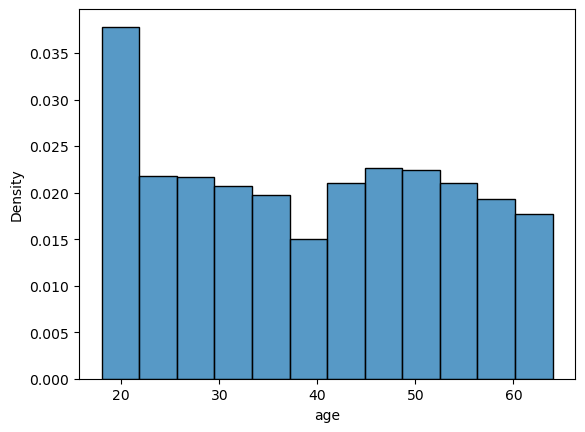

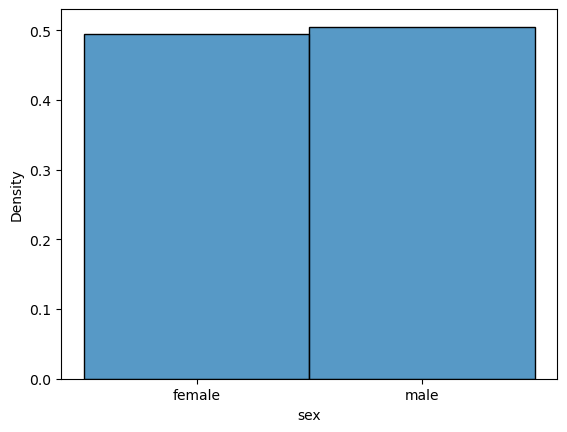

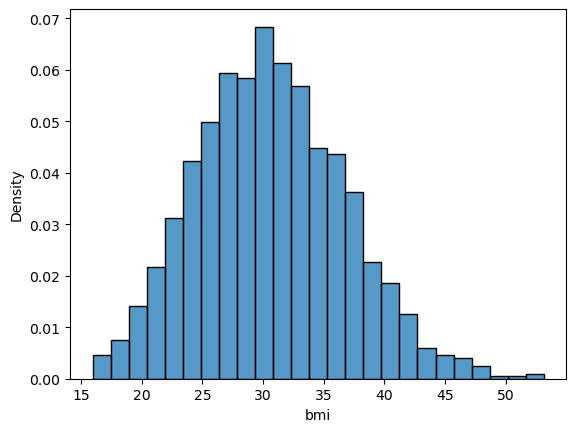

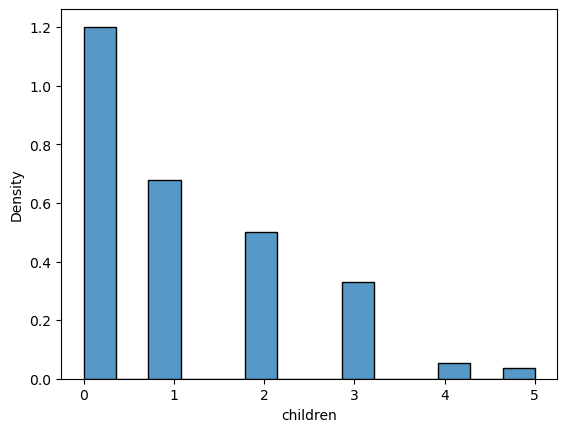

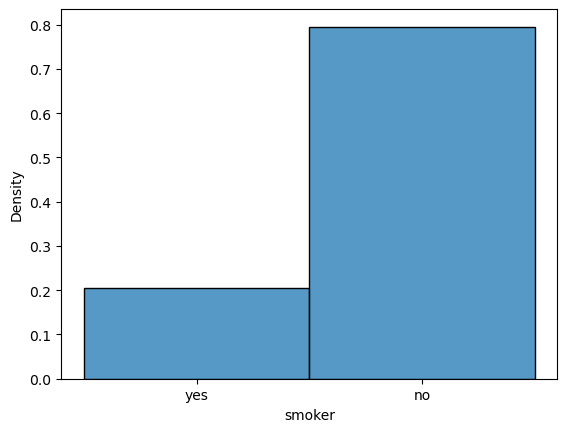

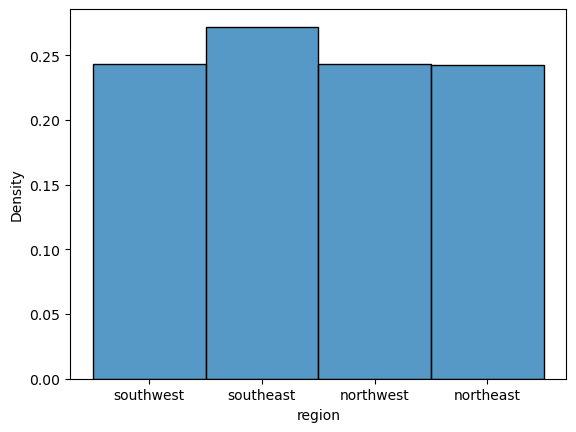

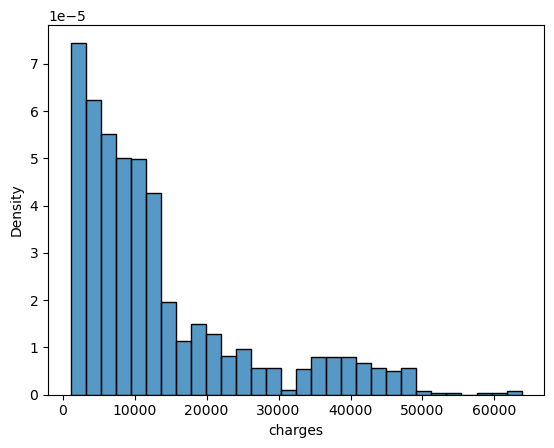

In [22]:
#for i in data_regression.columns:
 #   plt.figure(i)
  #  sns.histplot(data_regression[i],stat="density")
   # plt.show()

In [24]:
X_2=data_regression[['age','sex','bmi','children', 'smoker','region']].to_numpy()

In [26]:
Y_2=data_regression[['charges']].to_numpy().reshape(-1)

In [28]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.5, random_state=24) #Разделение данных на тренировочную, тестовую и валидационную выборки
X_test_2, X_val_2,y_test_2, y_val_2 = train_test_split(X_test_2, y_test_2, test_size=0.5, random_state=24)

In [30]:
X_train_2=make_nans(X_train_2,0.01)#Добавление пропусков в данные
X_test_2=make_nans(X_test_2,0.01)

## Классификация данных с помощью дерева решений

In [32]:
from Trees import DecisionTreeClassifier

In [184]:
dec=DecisionTreeClassifier()
start = time.time()
dec.fit(X_train_1,y_train_1, crit='e') #Обучение дерева с энтропийным критерием информативности
end = time.time()

In [185]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 26763.089895248413 ms


In [188]:
dec.rules #Вывод дерева

[[['0', 'node', 0, 7.0]],
 [['00', 'node', 7, 'Winter'], ['01', 'node', 8, 5.5]],
 [['000', 'node', 3, 26.0],
  ['001', 'node', 8, 6.0],
  ['010', 'node', 6, 4],
  ['011', 'node', 6, 5]],
 [['0000', 'node', 5, 874.63],
  ['0001', 'node', 1, 84],
  ['0010', 'node', 1, 60],
  ['0011', 'node', 0, -9.0],
  ['0100', 'node', 3, 50.0],
  ['0101', 'node', 4, 'overcast'],
  ['0110', 'node', 3, 50.0],
  ['0111', 'node', 3, 20.0]],
 [['00000', 'node', 1, 59],
  ['00001', 'node', 5, 998.74],
  ['00010', 'node', 9, 'mountain'],
  ['00011', 'leaf', 'Snowy', 4],
  ['00100', 'node', 0, -7.0],
  ['00101', 'node', 3, 50.0],
  ['00110', 'node', 9, 'inland'],
  ['00111', 'node', 0, 4.0],
  ['01000', 'node', 5, 1000.58],
  ['01001', 'node', 5, 1020.87],
  ['01010', 'node', 4, 'partly cloudy'],
  ['01011', 'node', 2, 12.5],
  ['01100', 'node', 8, 9.5],
  ['01101', 'node', 5, 1011.56],
  ['01110', 'node', 8, 14.0],
  ['01111', 'node', 1, 77]],
 [['000000', 'leaf', 'Cloudy', 2],
  ['000001', 'node', 1, 63],
 

In [190]:
pred_1=dec.predict(X_test_1)
print('Точность предсказания:', np.sum(pred_1==y_test_1)/len(y_test_1))

Точность предсказания: 0.8724242424242424


In [192]:
dec_2=DecisionTreeClassifier()
start = time.time()
dec_2.fit(X_train_1,y_train_1, crit='d') #Обучение дерева с критерием информативности Донского
end = time.time()

In [193]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 572986.0792160034 ms


In [53]:
dec_2.rules #Вывод дерева

[[['0', 'node', 8, 5.5]],
 [['00', 'node', 0, 10.0], ['01', 'node', 6, 5]],
 [['000', 'node', 7, 'Winter'],
  ['001', 'node', 6, 4],
  ['010', 'node', 3, 50.0],
  ['011', 'node', 3, 20.0]],
 [['0000', 'node', 1, 50],
  ['0001', 'node', 1, 70],
  ['0010', 'node', 3, 54.0],
  ['0011', 'node', 2, 14.0],
  ['0100', 'node', 8, 9.0],
  ['0101', 'node', 5, 1012.87],
  ['0110', 'node', 8, 10.0],
  ['0111', 'node', 1, 70]],
 [['00000', 'node', 5, 1013.8],
  ['00001', 'node', 2, 10.5],
  ['00010', 'node', 1, 60],
  ['00011', 'node', 6, 14],
  ['00100', 'node', 3, 50.0],
  ['00101', 'node', 4, 'overcast'],
  ['00110', 'node', 5, 1011.68],
  ['00111', 'node', 4, 'overcast'],
  ['01000', 'node', 5, 1017.86],
  ['01001', 'node', 8, 9.5],
  ['01010', 'node', 1, 72],
  ['01011', 'node', 5, 1033.2],
  ['01100', 'node', 0, 20.0],
  ['01101', 'node', 8, 10.5],
  ['01110', 'node', 8, 13.0],
  ['01111', 'node', 5, 1014.11]],
 [['000000', 'node', 6, 9],
  ['000001', 'node', 1, 39],
  ['000010', 'node', 2, 8

In [60]:
pred_2=dec_2.predict(X_test_1)#Точность оказалась выше
print('Точность предсказания:', np.sum(pred_2==y_test_1)/len(y_test_1))

Точность предсказания: 0.8787878787878788


## Стрижка дерева решений

In [75]:
def split_data(x,y,crit,value):#Разделение данных на 2 части по предикату
    try: 
        x[:,crit].astype('float64')
        X_r=x[np.where(x[:,crit]>=value)]
        X_l=x[np.where(x[:,crit]<value)]
        y_r=y[np.where(x[:,crit]>=value)]
        y_l=y[np.where(x[:,crit]<value)]
    except ValueError:
        X_r=x[np.where(x[:,crit]==value)]
        X_l=x[np.where(x[:,crit]!=value)]
        y_r=y[np.where(x[:,crit]==value)]
        y_l=y[np.where(x[:,crit]!=value)]
    return X_r, X_l, y_r,y_l

def sum_dicts(d_1,d_2): #Функция для суммирования словарей по ключу
    for i in d_1.keys():
        d_1[i]+=d_2[i]
    return d_1

def get_values(rules, level, key, un): #Получение сумм всех предсказаний по листам, исходящих из вершины
    d={}
    for i in un:
        d[i]=0
    for spl in rules[level+1]:
        if spl[0]==key+'0' or spl[0]==key+'1':
            if spl[1]=='leaf':
                d[spl[2]]+=spl[3]
            else:
                d=sum_dicts(d,get_values(rules, level+1,spl[0],un))
    return d

def delete_branch(rul, index, lvl):#Удаление одной из веток узла
    indexes=[index]
    r=rul.copy()
    while lvl<=len(r)-1:
        to_delete=[]
        for ind, rule in enumerate(r[lvl]):
            if rule[0] in indexes:
                indexes.extend([rule[0]+'0', rule[0]+'1'])
                to_delete.append(ind)
        for i in list(reversed(to_delete)):
            r[lvl].pop(i)
        lvl+=1
    return r

def move_values(rul, level, ind_1,ind_2):#Перемещение ветки на один уровень выше
    indexes=[ind_2+'0',ind_2+'1']
    k='0'
    to_delete=[]
    to_next=[]
    for ind, split in enumerate(rul[level+1]):
        if split[0] in indexes:
            rul[level].append([ind_1+k, split[1], split[2],split[3]])
            if split[1]=='node':
                to_next.append([ind_1+k,split[0]]) 
            k='1'
            to_delete.append(ind)
    for i in list(reversed(to_delete)):
        rul[level+1].pop(i)
    for el in to_next:
        move_values(rul, level+1, el[0], el[1])
    return rul

def change_nodes(rules, index, level, way):#Полная замена узла на ветку
    if way==0:
        ind_to_del=index+'1'
        ind_to_move=index+'0'
    else:
        ind_to_del=index+'0'
        ind_to_move=index+'1'
    rules=delete_branch(rules, ind_to_del, level+1)#Удаление другой ветки
    if way==0:
        lvl=level+1
        while lvl<=len(rules)-1:
            for spl in rules[lvl]:
                if spl[0][:level+2]==ind_to_move:
                   spl[0]=ind_to_del+spl[0][level+2:]
            lvl+=1
        ind_to_move=ind_to_del
    for num, split in enumerate(rules[level+1]):#Меняем узел на нужную ветку
        if split[0]==ind_to_move:
            for n, spl in enumerate(rules[level]):
                if spl[0]==index:
                    ix=n
            rules[level][ix]=[index, split[1],split[2],split[3]]
            rules[level+1].pop(num)
    rules=move_values(rules,level+1,index, ind_to_move)#Сдвигаем ветку на уровень вверх
    return rules

def make_leaf(r,level, ind, un):#Превращение узла в лист
    d=get_values(r, level,ind, un)
    r=delete_branch(r, ind+'0', level+1)
    r=delete_branch(r, ind+'1', level+1)
    for i, split in enumerate(r[level]):
        if split[0]==ind:
            n=i
    r[level][n]=[ind, 'leaf', (max(zip(d.values(), d.keys()))[1]),(max(zip(d.values(), d.keys()))[0])]
    return r

def find_best_node(classifier, index, level, X_test, y_test):#Поиск лучшего варианта изменения узла при стрижки дерева
    r_1=copy.deepcopy(classifier.rules)
    r_1=change_nodes(r_1,index,level,1)
    r_2=copy.deepcopy(classifier.rules)
    r_2=change_nodes(r_2,index,level,0)
    r_3=copy.deepcopy(classifier.rules)
    r_3=make_leaf(r_3, level,index, np.unique(y_test))
    dc_1=DecisionTreeClassifier()
    dc_1.rules=r_1
    dc_2=DecisionTreeClassifier()
    dc_2.rules=r_2
    dc_3=DecisionTreeClassifier()
    dc_3.rules=r_3
    predicts=[np.sum(classifier.predict(X_test)==y_test)/len(y_test),np.sum(dc_1.predict(X_test)==y_test)/len(y_test),
              np.sum(dc_2.predict(X_test)==y_test)/len(y_test),np.sum(dc_3.predict(X_test)==y_test)/len(y_test)]
    if predicts[1]==max(predicts):
        return r_1
    elif predicts[2]==max(predicts):
        return r_2
    elif predicts[3]==max(predicts):
        return r_3
    else:
        return classifier.rules

def prune(tree, X_val, y_val):#Стрижка дерева
    level=0
    index='0'
    d={'0':[X_val,y_val]}
    while level<=len(tree.rules)-1:
        c=0
        while c<=len(tree.rules[level])-1:
            if tree.rules[level][c][1]=='node':
                if len(d.get(tree.rules[level][c][0])[0])==0:
                    tree.rules=make_leaf(tree.rules,level,tree.rules[level][c][0], tree.uniques)
                else:
                    tree.rules=find_best_node(tree,tree.rules[level][c][0],level,X_val,y_val)
                    if tree.rules[level][c][1]=='node':
                        X_l,X_r,y_l,y_r=split_data(d.get(tree.rules[level][c][0])[0],d.get(tree.rules[level][c][0])[1],tree.rules[level][c][2],tree.rules[level][c][3])
                        d[tree.rules[level][c][0]+'0']=[X_l,y_l]
                        d[tree.rules[level][c][0]+'1']=[X_r,y_r]
            c+=1
        level+=1
    to_del=[]
    for i, level in enumerate(tree.rules):
        if len(level)==0:
            to_del.append(i)
    for i in list(reversed(to_del)):
        tree.rules.pop(i)
    return tree.rules

In [77]:
dec_2.rules=prune(dec, X_val_1,y_val_1)

In [79]:
dec_2.rules

[[['0', 'node', 0, 7.0]],
 [['00', 'node', 7, 'Winter'], ['01', 'node', 8, 5.5]],
 [['000', 'leaf', 'Rainy', 49],
  ['001', 'node', 8, 5.5],
  ['010', 'node', 6, 4],
  ['011', 'node', 6, 5]],
 [['0010', 'leaf', 'Snowy', 1500],
  ['0011', 'node', 2, 15.0],
  ['0100', 'node', 3, 50.0],
  ['0101', 'node', 4, 'overcast'],
  ['0110', 'node', 3, 50.0],
  ['0111', 'node', 8, 14.0]],
 [['00110', 'node', 0, -9.0],
  ['00111', 'leaf', 'Snowy', 9],
  ['01000', 'node', 5, 1025.79],
  ['01001', 'leaf', 'Rainy', 1311],
  ['01010', 'node', 4, 'cloudy'],
  ['01011', 'node', 2, 11.5],
  ['01100', 'node', 1, 50],
  ['01101', 'node', 4, 'overcast'],
  ['01110', 'leaf', 'Sunny', 1165],
  ['01111', 'leaf', 'Snowy', 5]],
 [['001100', 'node', 2, 14.0],
  ['001101', 'leaf', 'Sunny', 11],
  ['010110', 'leaf', 'Cloudy', 18],
  ['010111', 'node', 5, 1001.23],
  ['010000', 'leaf', 'Cloudy', 58],
  ['010001', 'leaf', 'Snowy', 1],
  ['010100', 'leaf', 'Sunny', 103],
  ['010101', 'node', 1, 63],
  ['011000', 'leaf',

In [83]:
pred_2_pruned=dec_2.predict(X_test_1)#Точность немного снизилась
print('Точность предсказания:', np.sum(pred_2_pruned==y_test_1)/len(y_test_1))

Точность предсказания: 0.8745454545454545


## Решение задачи регрессии с помощью деревьев решений

In [86]:
from Trees import DecisionTreeRegressor

In [98]:
dtc=DecisionTreeRegressor(7)#Создание дерева с максимальной глубиной

In [224]:
start = time.time()
dtc.fit(X_train_2,y_train_2)#Обучение дерева
end = time.time()

In [226]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 1771.1875438690186 ms


In [101]:
dtc.rules

[[['0', 'node', 4, 'yes']],
 [['00', 'node', 0, 48], ['01', 'node', 2, 30.78]],
 [['000', 'node', 0, 23],
  ['001', 'node', 0, 52],
  ['010', 'node', 0, 42],
  ['011', 'node', 0, 43]],
 [['0000', 'node', 2, 35.31],
  ['0001', 'node', 1, 'male'],
  ['0010', 'node', 2, 29.7],
  ['0011', 'node', 3, 4],
  ['0100', 'node', 2, 30.02],
  ['0101', 'node', 2, 30.69],
  ['0110', 'node', 2, 33.63],
  ['0111', 'node', 2, 47.41]],
 [['00000', 'node', 3, 2],
  ['00001', 'node', 2, 35.4],
  ['00010', 'node', 0, 24],
  ['00011', 'node', 0, 34],
  ['00100', 'node', 2, 25.365],
  ['00101', 'node', 1, 'male'],
  ['00110', 'node', 3, 1],
  ['00111', 'node', 0, 61],
  ['01000', 'node', 0, 31],
  ['01001', 'node', 0, 22],
  ['01010', 'node', 2, 27.8],
  ['01011', 'leaf', 7731.4271, 1],
  ['01100', 'node', 0, 33],
  ['01101', 'node', 2, 41.895],
  ['01110', 'node', 0, 59],
  ['01111', 'leaf', 63770.42801, 1]],
 [['000000', 'node', 0, 21],
  ['000001', 'node', 5, 'northwest'],
  ['000010', 'leaf', 27724.28875

In [104]:
def mse(y_pred, y):#Функция потрь - MSE
  err = np.mean(np.square(y_pred - y))
  return err

In [106]:
mse(dtc.predict(X_test_2),y_test_2)

37040027.143728174

## Стрижка дерева решений

In [117]:
def get_average_value(rules,level,key):#Получение среднего значения по листам, исходящего от узла
    vals=[]
    for spl in rules[level+1]:
        if spl[0]==key+'0' or spl[0]==key+'1':
            if spl[1]=='leaf':
                vals.append([spl[2],spl[3]])
            else:
                for v in get_average_value(rules,level+1,spl[0]):
                    vals.append(v)
    return vals

def make_leaf_r(r,level, ind):#Замена узла на лист для регрессии
    summa=np.sum(np.array([a[0]*a[1] for a in get_average_value(r,level,ind)]))
    kol=np.sum(np.array([a[1] for a in get_average_value(r,level,ind)]))
    r=delete_branch(r, ind+'0', level+1)
    r=delete_branch(r, ind+'1', level+1)
    for i, split in enumerate(r[level]):
        if split[0]==ind:
            n=i
    r[level][n]=[ind, 'leaf', summa/kol,kol]
    print(r[level][n])
    return r

def find_best_node_r(classifier, index, level, X_test, y_test):#Поиск наилучшего варианта обрезки узла для регрессии
    r_1=copy.deepcopy(classifier.rules)
    r_1=change_nodes(r_1,index,level,1)
    r_2=copy.deepcopy(classifier.rules)
    r_2=change_nodes(r_2,index,level,0)
    r_3=copy.deepcopy(classifier.rules)
    r_3=make_leaf_r(r_3, level,index)
    dc_1=DecisionTreeRegressor(classifier.depth)
    dc_1.rules=r_1
    dc_2=DecisionTreeRegressor(classifier.depth)
    dc_2.rules=r_2
    dc_3=DecisionTreeRegressor(classifier.depth)
    dc_3.rules=r_3
    predicts=[mse(classifier.predict(X_test),y_test),mse(dc_1.predict(X_test),y_test),
              mse(dc_2.predict(X_test),y_test),mse(dc_3.predict(X_test),y_test)]
    if predicts[1]==min(predicts):
        return r_1
    elif predicts[2]==min(predicts):
        return r_2
    elif predicts[3]==min(predicts):
        return r_3
    else:
        return classifier.rules

def prune_r(tree, X_val, y_val):#Стрижка дерева для задачи регрессии
    level=0
    index='0'
    d={'0':[X_val,y_val]}
    while level<=len(tree.rules)-1:
        c=0
        while c<=len(tree.rules[level])-1:
            if tree.rules[level][c][1]=='node':
                if len(d.get(tree.rules[level][c][0])[0])==0:
                    tree.rules=make_leaf_r(tree.rules,level,tree.rules[level][c][0])
                else:
                    tree.rules=find_best_node_r(tree,tree.rules[level][c][0],level,X_val,y_val)
                    if tree.rules[level][c][1]=='node':
                        X_l,X_r,y_l,y_r=split_data(d.get(tree.rules[level][c][0])[0],d.get(tree.rules[level][c][0])[1],tree.rules[level][c][2],tree.rules[level][c][3])
                        d[tree.rules[level][c][0]+'0']=[X_l,y_l]
                        d[tree.rules[level][c][0]+'1']=[X_r,y_r]
            c+=1
        level+=1
    to_del=[]
    for i, level in enumerate(tree.rules):
        if len(level)==0:
            to_del.append(i)
    for i in list(reversed(to_del)):
        tree.rules.pop(i)
    return tree.rules

In [111]:
dtc.rules=prune_r(dtc, X_val_2,y_val_2)

['0', 'leaf', 13465.164887248133, 669]
['00', 'leaf', 8773.447638618147, 529]
['01', 'leaf', 31193.15363385714, 140]
['000', 'leaf', 5942.854003579104, 335]
['001', 'leaf', 13661.328400154636, 194]
['010', 'leaf', 21861.387576533332, 75]
['011', 'leaf', 41960.5760076923, 65]
['0000', 'leaf', 3391.516099439561, 91]
['0001', 'leaf', 6894.377566188524, 244]
['0110', 'leaf', 38295.462545806455, 31]
['0111', 'leaf', 45302.29710529412, 34]
['0010', 'leaf', 14315.19608173611, 144]
['0011', 'leaf', 25487.340155, 2]
['01100', 'leaf', 35452.82003, 10]
['01101', 'leaf', 39649.10183904762, 21]
['00100', 'leaf', 13367.888788607595, 79]
['00101', 'leaf', 15466.538791846153, 65]
['00000', 'leaf', 2244.63327465, 60]
['00001', 'leaf', 5989.032836153846, 13]
['01110', 'leaf', 43178.34617409091, 22]
['01111', 'leaf', 47871.27797636364, 11]


In [119]:
dtc.rules

[[['0', 'node', 4, 'yes']],
 [['00', 'node', 0, 48], ['01', 'node', 2, 30.78]],
 [['000', 'node', 0, 23],
  ['001', 'node', 3, 4],
  ['010', 'leaf', 21861.387576533332, 75],
  ['011', 'node', 0, 43]],
 [['0000', 'node', 3, 2],
  ['0001', 'leaf', 6894.377566188524, 244],
  ['0110', 'node', 2, 33.63],
  ['0111', 'node', 0, 59],
  ['0010', 'node', 3, 1],
  ['0011', 'leaf', 14394.39815, 1]],
 [['01100', 'leaf', 35452.82003, 10],
  ['01101', 'node', 3, 1],
  ['00100', 'leaf', 12418.1885815625, 32],
  ['00101', 'leaf', 15466.538791846153, 65],
  ['00000', 'leaf', 2244.63327465, 60],
  ['00001', 'node', 5, 'northwest'],
  ['01110', 'leaf', 43178.34617409091, 22],
  ['01111', 'leaf', 47871.27797636364, 11]],
 [['000010', 'leaf', 4791.695333, 10],
  ['000011', 'leaf', 9980.157846666667, 3],
  ['011010', 'leaf', 36847.78365, 3],
  ['011011', 'leaf', 39522.64965857143, 14]]]

In [115]:
mse(dtc.predict(X_test_2),y_test_2)#После стрижки качество улучшилось

34496285.70853576

## Сравнение с эталонными реализациями

In [122]:
from sklearn.tree import DecisionTreeRegressor as EtalonRegressor
from sklearn.tree import DecisionTreeClassifier as EtalonClassifier

In [198]:
df_c=data_classify.copy(deep=True)

In [200]:
ohe=OneHotEncoder(sparse_output=False)
X_2=ohe.fit_transform(df_c[['Cloud Cover','Season','Location']])
X=np.concatenate((X_2,df_c[['Temperature','Humidity','Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index','Visibility (km)' ]].to_numpy()),axis=1)
y=df_c[['Weather Type']].to_numpy().reshape(-1)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=24)#Делим на точно такие же выборки
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=24) 
X_train=make_nans(X_train,0.01)#Добавление пропусков в данные
X_test=make_nans(X_test,0.01)

In [204]:
etc=EtalonClassifier(criterion='entropy')

In [206]:
start = time.time()
etc.fit(X_train, y_train)
end=time.time()

In [210]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 32.00340270996094 ms


In [208]:
pred_et=etc.predict(X_test)
print('Точность предсказания:', np.sum(pred_et==y_test)/len(y_test))#Точность выше, чем у написанного алгоритма

Точность предсказания: 0.9066666666666666


In [212]:
df_r=data_regression.copy(deep=True)

In [214]:
ohe2=OneHotEncoder(sparse_output=False)
X_2=ohe2.fit_transform(df_r[['sex','smoker','region']])
X=np.concatenate((X_2,df_r[['age','bmi','children']].to_numpy()),axis=1)
y=df_r[['charges']].to_numpy().reshape(-1)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=24)#Делим на точно такие же выборки
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=24) 
X_train=make_nans(X_train,0.01)#Добавление пропусков в данные
X_test=make_nans(X_test,0.01)

In [218]:
etr=EtalonRegressor(criterion='squared_error', max_depth=7)

In [220]:
start = time.time()
etr.fit(X_train, y_train)
end=time.time()

In [222]:
print("Время выполнения программы:",
      (end-start) * 10**3, "ms")

Время выполнения программы: 2.008676528930664 ms


In [182]:
mse(etr.predict(X_test),y_test) #MSE больше, чем у написанной реализации

35757341.22049978